# Perceptron

The perceptron is a simple single layer neural network that takes an input vector $\boldsymbol{x} = [x_1, x_2, ..., x_n]$, multiplies it by a weight vector $\boldsymbol{w} = [w_1, w_2, ..., w_n]$, sums the weighted inputs, and passes the $\sum_i w_ix_i$ added to a bias $w_0$ as $z =  w_0 +  \sum_i w_ix_i$  through an activation function $g(z)$ to produce an output $\hat{y}$:

$$z = \mathrm{bias} + \mathrm{linear\_ combination\_ of \_ inputs}$$
$$z = w_0 + \boldsymbol{w}^T\boldsymbol{x} = w_0 +  \sum_i w_ix_i $$
$$\hat{y} = g(z) $$

The activation function $g$ introduces nonlinearity to allow the perceptron to learn complex mappings from inputs to outputs. Typical choices for $g$ are `sigmoid`, `tanh`, or `ReLU` functions, though the original perceptron used a step function.

The perceptron can be trained via supervised learning, adjusting the weights and biases to minimize the loss between the predicted $\hat{y}$ and the true label $y^{\text{true}}$. Backpropagation combined with gradient descent can be used to iteratively update the weights to reduce the loss.

The key components of a perceptron are:
* Input vector $\boldsymbol{x}$
* Weight vector $\boldsymbol{w}$
* Weighted sum $z = \boldsymbol{w}^T\boldsymbol{x}$
* Nonlinear activation $g$
* Output prediction $\hat{y}$

The perceptron provides a basic model of a neuron, and multilayer perceptrons composed of many interconnected perceptrons can be used to build neural networks with substantial representational power. A perceptron takes a set of inputs, scales them by corresponding weights, sums them together with a bias, applies a non-linear step function, and produces an output. This simple model can represent linear decision boundaries and serves as a building block for more complex neural networks. In training, weights are updated based on the difference between the predicted output and the actual label, often using the Perceptron learning algorithm.


![Perceptron](perceptron.png)

> Credits: Alexander Amini, MIT

## Bingham model

### Single parameter perceptron

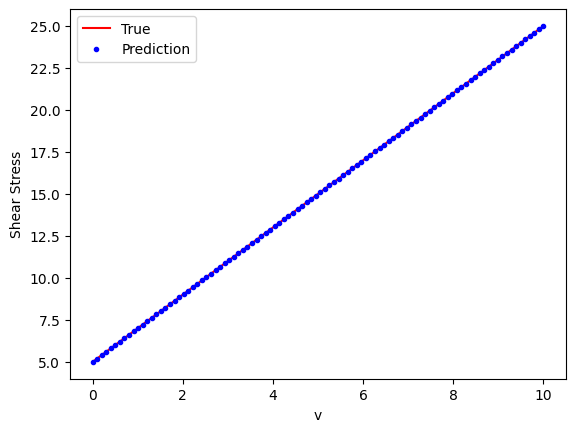

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
num_samples = 1000
v_values = np.random.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

# Initialize model weights
weights = np.random.randn(1, 1)
bias = np.random.randn()
learning_rate = 0.01

# Training loop
epochs = 10000
# Loss history
losses = np.zeros(epochs)
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(v_values, weights) + bias
    loss = ((y_pred - y_true) ** 2).mean()
    losses[epoch] = loss

    # Compute gradients
    grad_output = 2 * (y_pred - y_true) / num_samples
    grad_weights = np.dot(v_values.T, grad_output)
    grad_bias = grad_output.sum()

    # Update weights using gradient descent
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

# Evaluation
v_eval = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred_eval = np.dot(v_eval, weights) + bias
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval, y_true_eval, 'r-', label='True')
plt.plot(v_eval, y_pred_eval, 'b.', label='Prediction')
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

### Plot loss history

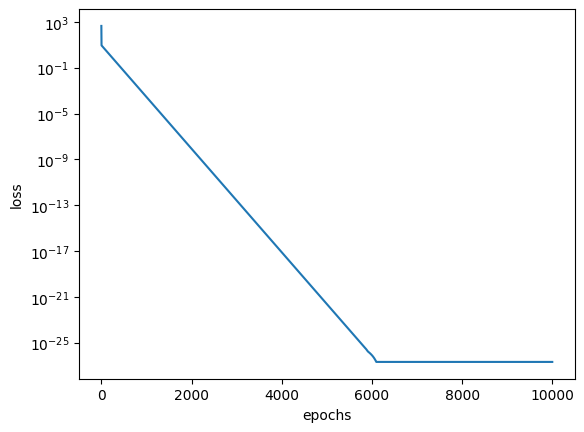

In [ ]:
plt.figure()
plt.semilogy(np.arange(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Weights and biases



In [ ]:
print("Weights: %.2f" % (weights))
print("Bias: %.2f" % (bias))

Weights: 2.04
Bias: 4.74


Given the mean squared error loss function:

$L = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{pred},i} - y_{\text{true},i})^2$

where NN is the number of samples, $y_{pred,i}$ is the predicted value for the i-th sample, and $y_{true,i}$​ is the true value for the i-th sample.

We want to find the gradient of this loss with respect to the predictions $y_{pred,i}$​, so we'll take the derivative of the loss with respect to $y_{pred,i}$:

$\frac{\partial L}{\partial y_{\text{pred},i}} = \frac{2}{N} \sum_{i=1}^{N} (y_{\text{pred},i} - y_{\text{true},i})$


### PyTorch version

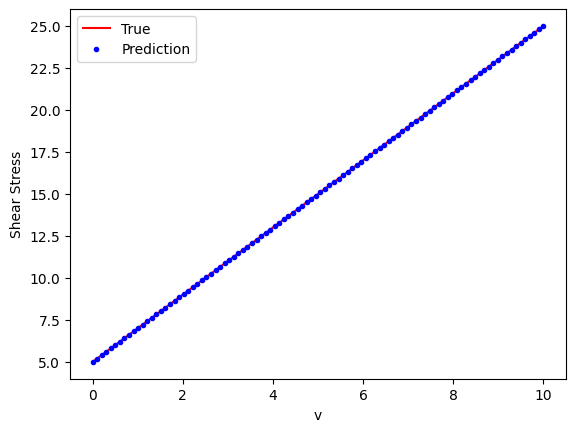

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_true = 5.0
mu_true = 2.0
y_true = tau0_true + mu_true * v_values

model = nn.Sequential(nn.Linear(1, 1), nn.ReLU())

# Loss and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 5000
for epoch in range(epochs):
    model.zero_grad()
    y_pred = model(v_values)
    loss = loss_function(y_pred, y_true)
    loss.backward()
    optimizer.step()


# Evaluation
v_eval = torch.linspace(0, 10, 100).view(-1, 1)
y_pred = model(v_eval)
y_true_eval = tau0_true + mu_true * v_eval

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True', )
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Prediction')
plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

## Multi-parameter perceptron

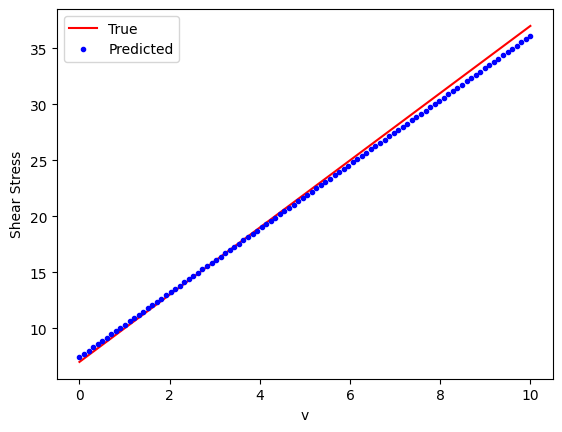

In [ ]:
# Generate data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_values = torch.rand(num_samples, 1) * 10
mu_values = torch.rand(num_samples, 1) * 5

# Inputs
inputs = torch.cat([v_values, tau0_values, mu_values], dim=1)

# Targets
y_true = tau0_values + mu_values * v_values

# Model
model = nn.Sequential(
    nn.Linear(3, 1),
    nn.ReLU()
)

# Training
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5000
for epoch in range(epochs):
    y_pred = model(inputs)
    loss = loss_fn(y_pred, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).view(-1, 1)
tau0_eval = 7 * torch.ones_like(v_eval)
mu_eval = 3 * torch.ones_like(v_eval)

inputs_eval = torch.cat([v_eval, tau0_eval, mu_eval], dim=1)

y_pred = model(inputs_eval)
y_true_eval = tau0_eval + mu_eval * v_eval

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True')
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Predicted')

plt.xlabel('v')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()

## Herschel-Buckley Nonlinear Model

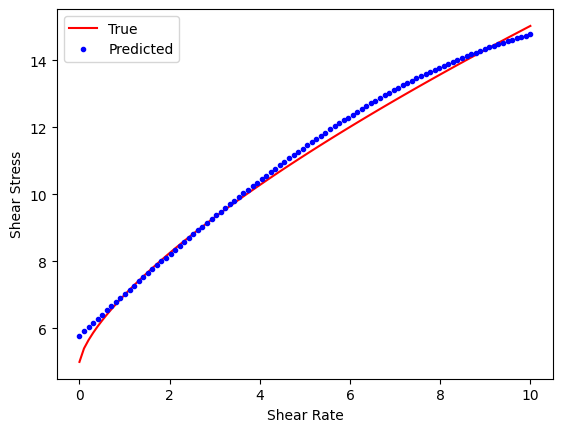

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate data
num_samples = 10000
v_values = torch.rand(num_samples, 1) * 10
tau0_values = torch.rand(num_samples, 1) * 5
k_values = torch.rand(num_samples, 1) * 2
n_values = torch.rand(num_samples, 1) * 0.5 + 0.5 # 0.5 - 1.0

# Inputs
inputs = torch.cat([v_values, tau0_values, k_values, n_values], dim=1)

# Targets
y_true = tau0_values + k_values * (v_values**n_values)

# Model
model = nn.Sequential(
   nn.Linear(4, 64),
   nn.Tanh(),
   nn.Linear(64,1)
)

# Training
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

epochs = 5000
for epoch in range(epochs):
   y_pred = model(inputs)
   loss = loss_fn(y_pred, y_true)

   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

# Evaluation
v_eval = torch.linspace(0, 10, 100).unsqueeze(1)
tau0_eval = 5 * torch.ones_like(v_eval)
k_eval = 2 * torch.ones_like(v_eval)
n_eval = 0.7 * torch.ones_like(v_eval)

inputs_eval = torch.cat([v_eval, tau0_eval, k_eval, n_eval], dim=1)
y_pred = model(inputs_eval)

y_true_eval = tau0_eval + k_eval * (v_eval**n_eval)

# Plot
plt.plot(v_eval.numpy(), y_true_eval.numpy(), 'r-', label='True')
plt.plot(v_eval.numpy(), y_pred.detach().numpy(), 'b.', label='Predicted')
plt.xlabel('Shear Rate')
plt.ylabel('Shear Stress')
plt.legend()
plt.show()